In [2]:
import pandas as pd

# Münchener Adressen
https://opendata.muenchen.de/dataset/adressen_opendata


- Länge der Namen
- Weg, Straße, Allee


- Männer Frauen
- In Straßennamen Fragen beantworten
- Lange/Kurze Namen
- Gibt es auch woanders in Deutschland?
- Dinge, die mit Reichtum zutun haben?
- Ausrichtung der Straßen
- Struktur der Straßennamen (xx-xx-Str., xxstr.)

- Wer A sagt muss auch B sagen

In [ ]:
adressen_df = pd.read_csv("raw_data/adressen_aktuell.txt")

In [5]:
adressen_df.head()

,STRASSE,STRANAM,HSZ
0,900,Donaustr.,32
1,1733,Häusserstr.,21
2,2010,Hitzestr.,7
3,2010,Hitzestr.,11
4,2053,Höslstr.,5


In [6]:
len(adressen_df)

161970

In [46]:
adressen_count_df = adressen_df.groupby("STRANAM").size().sort_values(ascending=False)

<Axes: title={'center': 'Top 10 Straßen in München nach Anzahl der Adressen'}, xlabel='Anzahl der Adressen', ylabel='Straße'>

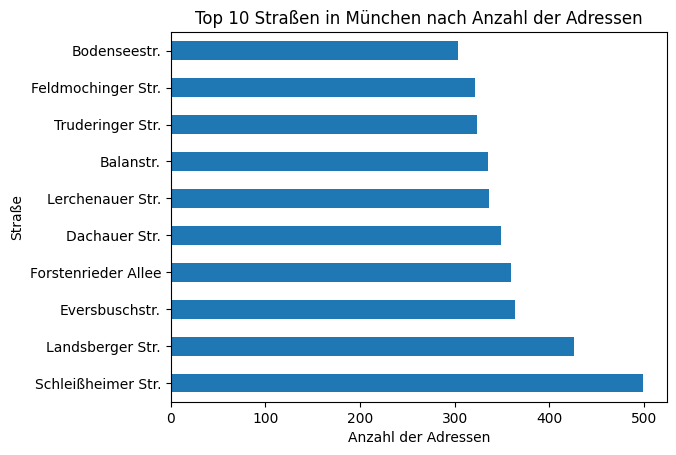

In [47]:
adressen_count_df.head(10).plot.barh(title="Top 10 Straßen in München nach Anzahl der Adressen", xlabel="Anzahl der Adressen", ylabel="Straße")

In [48]:
len(adressen_count_df)

6301

In [49]:
adressen_count_df

STRANAM
Schleißheimer Str.      499
Landsberger Str.        426
Eversbuschstr.          364
Forstenrieder Allee     359
Dachauer Str.           349
                       ... 
Thannkirchener Weg        1
Halterstr.                1
Theklastr.                1
Hanfgartenstr.            1
ALEXANDER-MIKLÓSY-W.      1
Length: 6301, dtype: int64

In [50]:
adressen_count_df = adressen_count_df.to_frame(name="count")

adressen_count_df["length"] = adressen_count_df.index.str.len()

In [52]:
adressen_count_df.sort_values("length", ascending=False)

,count,length
STRANAM,,
Platz der Opfer des Nationalsozialismus,1,39
Mathilde-Berghofer-Weichner-Str.,16,32
Margarete-Schütte-Lihotzky-Str.,28,31
Autobahn-Raststätte-Obermenzing,1,31
Rainer-Werner-Fassbinder-Pl.,3,28
...,...,...
Erkweg,2,6
Widweg,9,6
Lußweg,1,6


<Axes: title={'center': 'Top 10 längste Straßennamen in München'}, xlabel='Länge des Straßennamens', ylabel='Straße'>

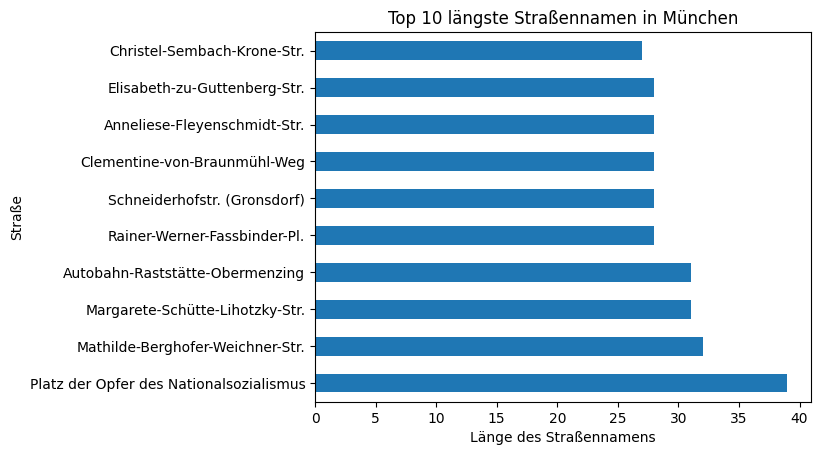

In [54]:
adressen_count_df.sort_values("length", ascending=False)["length"].head(10).plot.barh(title="Top 10 längste Straßennamen in München", xlabel="Länge des Straßennamens", ylabel="Straße")

In [63]:
def weg_str_allee(name):
    name = name.lower()
    if name.endswith("weg"):
        return "Weg"
    elif name.endswith("straße") or name.endswith("strasse") or name.endswith("str."):
        return "Straße"
    elif name.endswith("allee"):
        return "Allee"
    elif name.endswith("pl."):
        return "Platz"
    elif name.endswith("ring"):
        return "Ring"
    else:
        return "Andere"
    
adressen_count_df["Weg/Str/Allee"] = adressen_count_df.index.map(weg_str_allee)

<Axes: title={'center': 'Verteilung der Straßenarten in München'}>

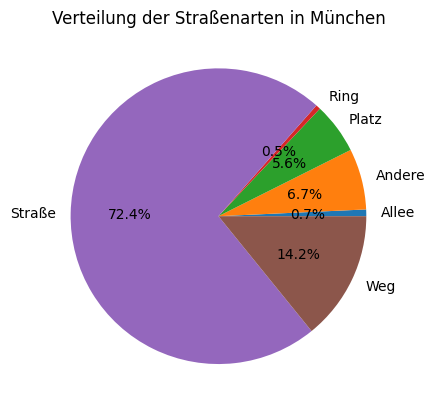

In [64]:
adressen_count_df.groupby("Weg/Str/Allee")["count"].size().plot.pie(title="Verteilung der Straßenarten in München", ylabel="", autopct="%1.1f%%")

In [66]:
adressen_count_df[adressen_count_df["Weg/Str/Allee"] == "Andere"].sort_values("count", ascending=False).head(20)

,count,length,Weg/Str/Allee
STRANAM,,,
Carl-Orff-Bogen,203,15,Andere
Friedenspromenade,183,17,Andere
Am Blütenanger,152,14,Andere
Am Lochholz,107,11,Andere
Am Moosfeld,105,11,Andere
Stiftsbogen,103,11,Andere
Klara-Ziegler-Bogen,102,19,Andere
Am Stadtpark,101,12,Andere
Auf den Schrederwiesen,90,22,Andere


In [71]:
import re

def street_name_type(name):
    regex = r".*-.*-str\."
    matches = re.search(regex, name.lower())

    if matches:
        return "Mehrfach-Str."
    
    regex = r".* str\."
    matches = re.search(regex, name.lower())

    if matches:
        return "Einfach-Str. mit Lücke"
    
    regex = r".*str\."
    matches = re.search(regex, name.lower())

    if matches:
        return "Einfach-Str. ohne Lücke"

In [72]:
adressen_count_df["Einfachstr"] = adressen_count_df.index.map(street_name_type)

<Axes: title={'center': 'Verteilung der Straßenarten in München'}>

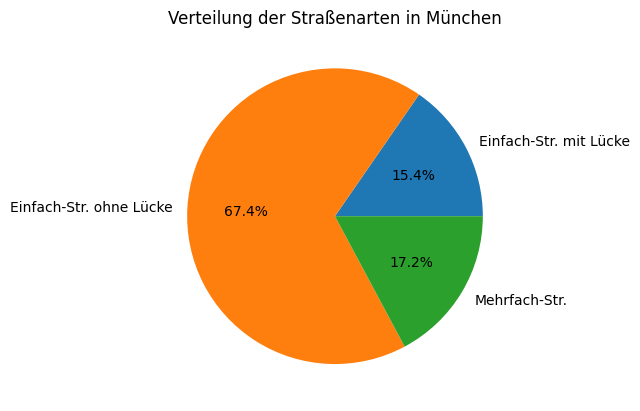

In [73]:
adressen_count_df.groupby("Einfachstr")["count"].size().plot.pie(title="Verteilung der Straßenarten in München", ylabel="", autopct="%1.1f%%")

In [74]:
adressen_count_df[adressen_count_df["Einfachstr"] == "Einfach-Str. ohne Lücke"].sort_values("count", ascending=False).head(20)

,count,length,Weg/Str/Allee,Einfachstr
STRANAM,,,,
Eversbuschstr.,364,14,Straße,Einfach-Str. ohne Lücke
Balanstr.,335,9,Straße,Einfach-Str. ohne Lücke
Bodenseestr.,303,12,Straße,Einfach-Str. ohne Lücke
Tegernseer Landstr.,246,19,Straße,Einfach-Str. ohne Lücke
Leopoldstr.,245,11,Straße,Einfach-Str. ohne Lücke
Wasserburger Landstr.,241,21,Straße,Einfach-Str. ohne Lücke
Willibaldstr.,240,13,Straße,Einfach-Str. ohne Lücke
Zehntfeldstr.,237,13,Straße,Einfach-Str. ohne Lücke
Hofangerstr.,231,12,Straße,Einfach-Str. ohne Lücke


# Wer A sagt muss auch B sagen